# Exercise 1 (Due: January 11, 2019 before midnight)

Complete the exercise below and submit it via D2L. Make sure the submitted notebook contains the Python code as well as the results of executing the code. Read the following notes first (from the class website) before you work on the exercise:
- Lecture slides #2 and its corresponding Jupyter notebook (lecture2.ipynb)
- Python (Getting started)

You will also need to download the following two data files from the class website and store them in the same folder as your Jupyter notebook file: 
- voting.csv
- fire_incidents_Pittsburgh.csv

**Step 1:** Install Anaconda python on your laptop (if you have not done so in the past). Make sure that the numpy and pandas library packages are also installed. 
a.	To check what packages are installed, type â€œconda listâ€ on the command prompt
b.	To install a specific package, say, pandas, type: â€œconda install pandasâ€
If you have not used iPython notebook, read the notes on â€œPython (Getting Started)â€ from the supplementary materials for lecture 1 on the class website.

**Step 2:** Download the data file voting.csv from the class web page. The data file contains information about voting records of the U.S. House of Representatives on 16 key bills in 1984. The first line in the file contains the attribute names. The original data was obtained from https://archive.ics.uci.edu/ml/datasets/congressional+voting+records. 

**Step 3:** Use pandas read_csv function to load the file into a data frame object named data.

In [1]:
import pandas as pd
data = pd.read_csv( 'voting.csv' )     # load data using pandas read_csv 

data.head()     # display the first 5 records/rows

,Party,Handicapped-infants,Water-Project,Budget resolution,Physician fee freeze,El Salvador aid,Religious groups in schools,Anti-satellite test ban,Aid to Nicaragua,MX missile,Immigration,Synfuels corporation cutback,Education,Superfund right-to-sue,Crime,Duty-free exports,Export admin-act-SA
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


**Step 4:** Create a pandas DataFrame object named counts that contains the number of republicans and democrats who voted yes on each of the following bills: 'Water project', 'MX Missile', 'Education', and 'Crime'.

In [2]:
df = data[data['Water-Project']=='y']
counts = pd.DataFrame(data['Party'].value_counts().sort_index())
counts.columns = ['Water-Project']
df = data[data['MX missile']=='y']
counts['MX missile'] = df['Party'].value_counts().sort_index()
df = data[data['Education']=='y']
counts['Education'] = df['Party'].value_counts().sort_index()
df = data[data['Crime']=='y']
counts['Crime'] = df['Party'].value_counts().sort_index()

counts

,Water-Project,MX missile,Education,Crime
democrat,267,188,36,90
republican,168,19,135,158


**Step 5:** Draw a bar chart that shows the number of republicans and democrats who voted yes on the following bills: 'Water project', 'Budget resolution', 'MX Missile', 'Immigration', and 'Education'.

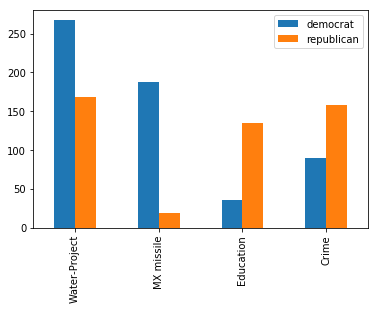

In [3]:
import matplotlib
%matplotlib inline

counts.T.plot(kind='bar')

**Step 6:** Write the correspoding Python regular expression to parse the fire incident data for the city of Pittsburgh (https://data.amerigeoss.org/dataset/73340325-143a-4ab1-b37f-b08caa399720). You should parse the sample data file (named fire_incidents_Pittsburgh.csv) provided on the class webpage instead of using the original raw data. Your Python code must extract the "incidence_type" (third column) and address (fourth column) from each line and display them on the screen. You are allowed to use only Python regular expression to do this (instead of using csv, pandas, or other library modules). Note that some columns contain commas while other columns may be empty. 

In [4]:
import re

regex = r'([^,]+)\,(\d+)\,\"?([^"]+)?\"?\,\"?([^"]+)?\"?\,([^,]+)\,([^,]+)?\,([^,]+)?'   # fill in the pattern

with open('fire_incidents_Pittsburgh.csv','r') as f:
    column_names = f.readline().strip().split(',')

    for line in f:
        fields = re.split(regex, line)              # fill in the function parameters
        print(fields[3] + ' at ' + fields[4])

Building fire at 800 BLOCK CENTER ST, WILKINSBURG PA 15221
Building fire at 1100 BLOCK JANE ST, WILKINSBURG PA 15221
Passenger vehicle fire at SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212
Passenger vehicle fire at 1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212
Building fire at 2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205
Outside rubbish fire, Other at S 7TH ST & E CARSON ST, PITTSBURGH PA 15203
Cooking fire, confined to container at 200 BLOCK E OHIO ST, PITTSBURGH PA 15212
Building fire at 7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206
Building fire at 100 BLOCK SPENCER AVE, PITTSBURGH PA 15227
Passenger vehicle fire at 1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216
